<h1> Diabetes Classification using Logistic Regression, KNN, Support Vector Machine and Random Forest </h1>

dataset https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

---------------------

<h2> EDA and Preprocessing </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Datasets\\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
#I want to know the categories being answered in the "smoking_history"
categs = df["smoking_history"].unique()
num_categs = df["smoking_history"].nunique()

print(f"categories: {categs}")
print(f"num of categories: {num_categs}")

categories: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
num of categories: 6


In [4]:
#I want to do the same thing with gender
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [5]:
#I want to know how much "No Info" are there, to decide if I can drop it
(df["smoking_history"] == "No Info").sum()

35816

<h3> Label Encoding </h3>

In [6]:
categ_mapping = {
    "No Info": 0,
    "never": 1,
    "current": 2,
    "former": 3,
    "ever": 4,
    "not current" : 5 
}

df["smoking_history"] = df["smoking_history"].map(categ_mapping)

#for gender
df["gender"] = df["gender"].map({"Male":0, "Female":1,"Other": 2})

In [51]:
#check the transformed df
df.head()
#note: 0 = No, 1 = Yes (for hypertension, smoking_history, diabetes)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0


In [56]:
df.iloc[26]

gender                   0.00
age                     67.00
hypertension             0.00
heart_disease            1.00
smoking_history          5.00
bmi                     27.32
HbA1c_level              6.50
blood_glucose_level    200.00
diabetes                 1.00
Name: 26, dtype: float64

In [50]:
df[df["diabetes"]==1].index

Index([    6,    26,    38,    40,    53,    55,    59,    81,    87,    94,
       ...
       99854, 99867, 99897, 99919, 99929, 99935, 99938, 99957, 99962, 99979],
      dtype='int64', length=8500)

In [8]:
#check null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<h3> Correlation Matrix </h3>

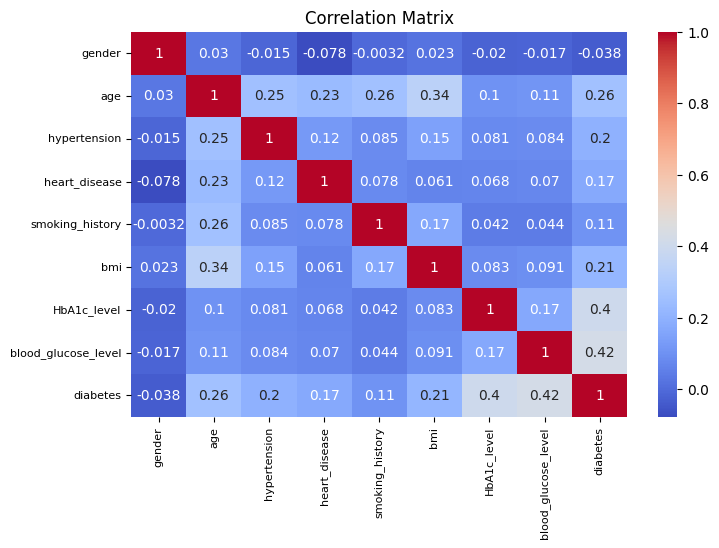

In [9]:
#I want to see the correlation of each category
plt.figure(figsize=(8, 5))
correlation_matrix = df.corr()

#heatmap
sns.heatmap(correlation_matrix, annot= True, cmap = "coolwarm")
plt.title("Correlation Matrix", fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

<h3> Pair plot </h3>

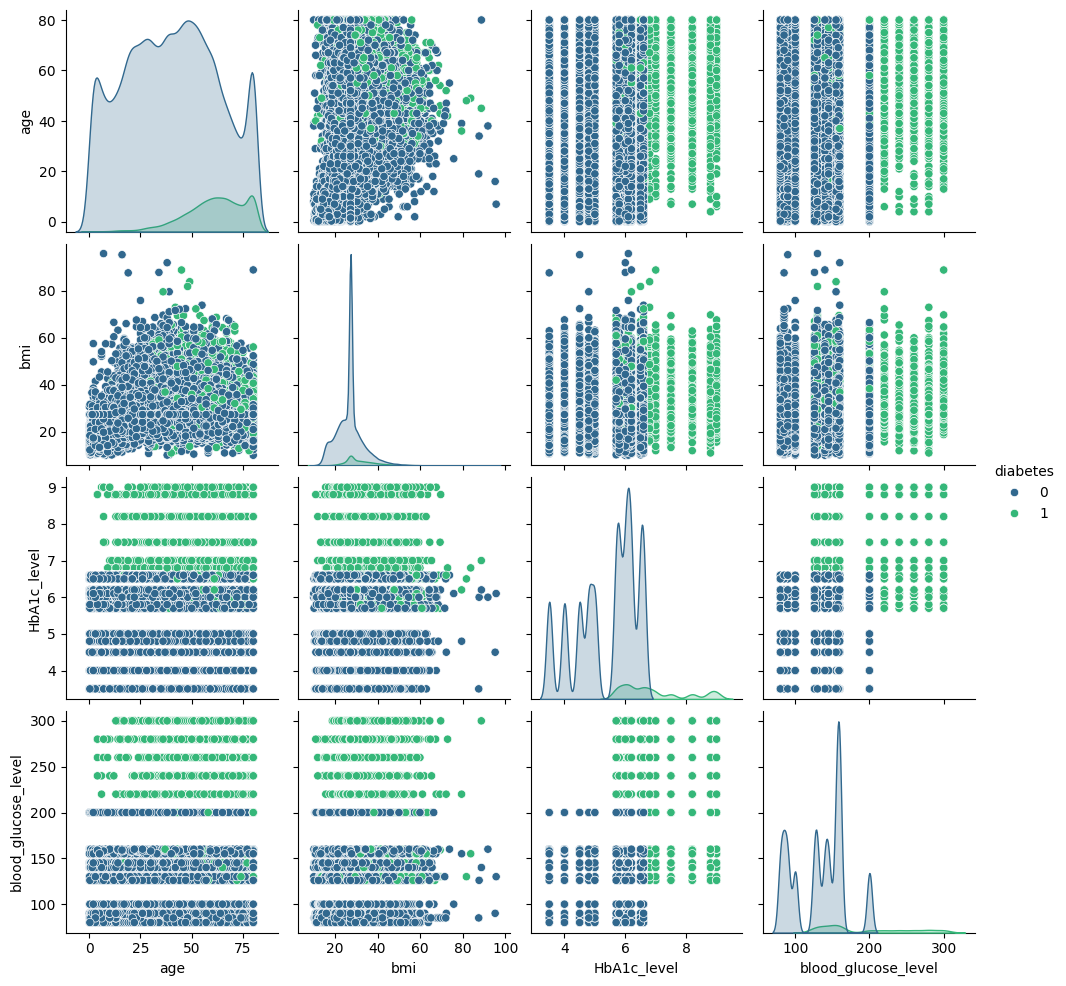

In [10]:
#visualizing the correlation using pairplot, I will choose only the most correleted ones from the matrix
sns.pairplot(df[["age","bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]] , hue = "diabetes", palette = 'viridis', diag_kind='kde')
#note, 0 = no diabetes, 1= diabetes

<h3> Normalization </h3>

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.drop(columns = ["diabetes"])
y = df["diabetes"]

#define standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2> Split Data </h2>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

<h1> Logistic Regression </h1>

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)

In [16]:
logreg_model_pred = (logreg_model.predict(X_test))

<h3> Model Evaluation </h3>

In [17]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [18]:
ac_score = accuracy_score(y_test, logreg_model_pred)
cr = classification_report(y_test, logreg_model_pred)

print(f"Accuracy score: {ac_score}")
print(cr)

Accuracy score: 0.9586
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



<h4> Confusion Matrix </h4>

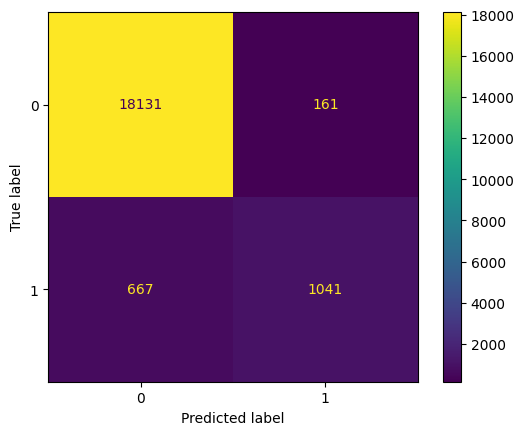

In [19]:
ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test)

--------------------

<h1> K Nearest Neighbors </h2>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KNN_model = KNeighborsClassifier(n_neighbors= 9, weights = 'uniform')
KNN_model = KNN_model.fit(X_train, y_train)

In [22]:
KNN_model_pred = KNN_model.predict(X_test)

<h2> Evaluation </h2>

In [23]:
KNN_ac = accuracy_score(y_test, KNN_model_pred)
KNN_cr = classification_report(y_test, KNN_model_pred)

print(f"Accuracy score: {KNN_ac}")
print(KNN_cr)

Accuracy score: 0.9614
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.93      0.59      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.95      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000



<h3> Confusion Matrix </h3>

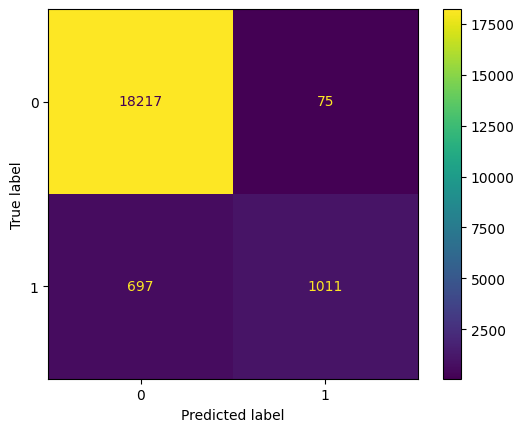

In [24]:
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

<h3> Cross Validation </h3>

-----------------

<h1> Support Vector Classifier </h1>

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC(kernel='rbf', C=5.0)
svc_model = svc_model.fit(X_train, y_train)

In [27]:
svc_model_pred = svc_model.predict(X_test)

<h3> Evaluation </h3>

In [28]:
svc_ac = accuracy_score(y_test, svc_model_pred)
svc_cr = classification_report(y_test, svc_model_pred)

print(f" Accuracy score: {svc_ac:.4f}")
print(svc_cr)

 Accuracy score: 0.9649
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.60      0.75      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.80      0.86     20000
weighted avg       0.97      0.96      0.96     20000



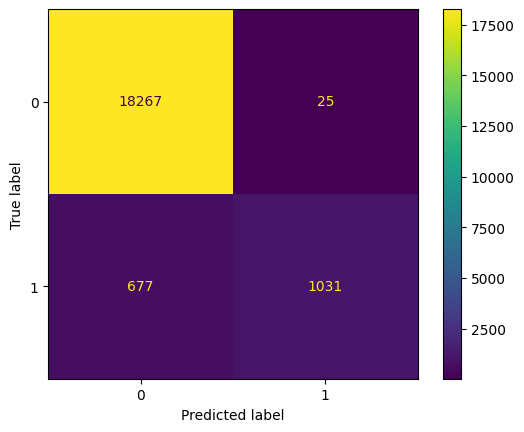

In [29]:
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test)

<h4> GridSearchCV </h4>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
}

# Initialize the SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


----------------------------

<h1> Random Forest Classifier </h1>

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc_model = RandomForestClassifier(n_estimators=50, max_features='sqrt', random_state=42)
rfc_model = rfc.fit(X_train, y_train)
rfc_model_pred = rfc_model.predict(X_test)

In [84]:
rfc_ac = accuracy_score(y_test, rfc_model_pred)
rfc_cr = classification_report(y_test, rfc_model_pred)

print(f" Accuracy score: {rfc_ac:.4f}")
print(rfc_cr)

 Accuracy score: 0.9701
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



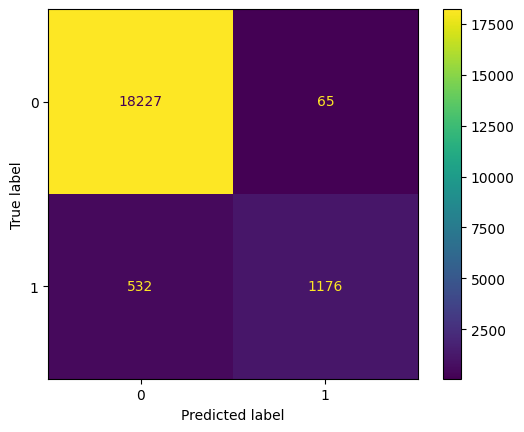

In [85]:
ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)